# **Reconstrucción**

Ejemplo: Extrapolación de Imágenes

En este ejemplo utilizaremos un modelo para extrapolación de imágenes llamado **Boundless**. Este modelo toma una imagen, enmascara una porción de la misma (ya sea 1/2, 1/4 o 3/4) y completa (extrapola) la sección enmascarada. En esencia le estamos pidiendo al modelo que complete una parte de la imagen que hace falta.

Comenzaremos por importar los módulos necesarios.


In [1]:
import tensorflow as tf
import tensorflow_hub as hub
from io import BytesIO
from PIL import Image as PilImage
import numpy as np
from matplotlib import pyplot as plt
import urllib

A continuación crearemos una función que nos permitirá cargar una imagen y darle el formato necesario para el modelo (257x257x3). La función recortará la imagen para que sea cuadrada.

In [8]:
def cargar_imagen(archivo):
    fd = None
    if(archivo.startswith('http')):
      agente = 'Mozilla/5.0 (Windows NT 6.1; Win64; x64)'
      encabezados = {'User-Agent': agente}
      req = urllib.request.Request(url=archivo, headers=encabezados)
      fd = urllib.request.urlopen(req)
    else:
      fd = tf.io.gfile.GFile(archivo, 'rb')

    imagen = PilImage.open(fd)
    ancho, alto = imagen.size
    # hacemos la imagen cuadrada
    imagen = imagen.crop((0, 0, alto, alto))
    imagen = imagen.resize((257,257),PilImage.LANCZOS) # Escalamos la imagen con "Alta resolución"
    imagen_array = np.array(imagen)
    imagen_np = np.expand_dims(
        imagen_array.astype(np.float32) / 255., axis=0)
    return imagen_np

Ahora crearemos una función auxiliar para mostrar lado a lado la imagen original, la imagen enmascarada y la imagen extrapolada, estas últimas dos siendo generadas por el modelo.

In [9]:
def mostrar_comparacion(img_original, img_mascara, img_extrapolada):
  plt.figure(figsize=(48,24))
  plt.subplot(131)
  plt.imshow((np.squeeze(img_original)))
  plt.title("Original", fontsize=24)
  plt.axis('off')
  plt.subplot(132)
  plt.imshow((np.squeeze(img_mascara)))
  plt.title("Enmascarada", fontsize=24)
  plt.axis('off')
  plt.subplot(133)
  plt.imshow((np.squeeze(img_extrapolada)))
  plt.title("Generada", fontsize=24)
  plt.axis('off')
  plt.show()

Ahora es momento de cargar una imagen, a continuación hay unas imagenes de ejemplo, puedes usar alguna otra, sin embargo el modelo no suele tener buenos resultados con rostros.

In [24]:
# Imagenes de muestra
# wikimedia = "https://upload.wikimedia.org/wikipedia/commons/thumb/3/31/Nusfjord_road%2C_2010_09.jpg/800px-Nusfjord_road%2C_2010_09.jpg"
# wikimedia = "https://upload.wikimedia.org/wikipedia/commons/thumb/4/47/Beech_forest_M%C3%A1tra_in_winter.jpg/640px-Beech_forest_M%C3%A1tra_in_winter.jpg"
# wikimedia = "https://upload.wikimedia.org/wikipedia/commons/thumb/b/b2/Marmolada_Sunset.jpg/640px-Marmolada_Sunset.jpg"
# wikimedia = "https://upload.wikimedia.org/wikipedia/commons/thumb/9/9d/Aegina_sunset.jpg/640px-Aegina_sunset.jpg"
# wikimedia = "https://upload.wikimedia.org/wikipedia/commons/b/b2/2019-06-09_Gnalp_%E2%80%93_300_Jahre_Liechtenstein_105_%28KPFC%29.jpg"
# wikimedia = "https://upload.wikimedia.org/wikipedia/commons/6/68/Bigsurflowers.jpg"
wikimedia = "https://upload.wikimedia.org/wikipedia/commons/0/0c/Flors_de_lotus.jpg"
# wikimedia = "https://upload.wikimedia.org/wikipedia/commons/a/ae/Mist_Covering_a_Meadow_under_Forest_Encroachment.jpg"

imagen = cargar_imagen(wikimedia)

Dentro de TensorFlow Hub hay 3 versiones del modelo Boundless: Half (mitad de la imagen), Quarter (un cuarto de la imagen), Three Quarters (tres cuartos de la imagen). En la siguiente celda puedes seleccionar el modelo que quieras poner a prueba.

In [28]:
nombre_modelo = 'cuarto' # @param ['Boundless Half', 'Boundless Quarter', 'Boundless Three Quarters']
diccionario_modelo = {
    'mitad' : 'https://tfhub.dev/google/boundless/half/1',
    'cuarto' : 'https://tfhub.dev/google/boundless/quarter/1',
    'tres_cuartos' : 'https://tfhub.dev/google/boundless/three_quarter/1'
}

modelo = diccionario_modelo[nombre_modelo]

Una vez seleccionado el modelo podemos cargarlo desde el TensorFlow hub

In [32]:
print(f"Loading model {nombre_modelo} ({modelo})")
mdl = hub.load(modelo)

Loading model cuarto (https://tfhub.dev/google/boundless/quarter/1)


El modelo tiene dos salidas:

*   La imagen de entrada con la máscara aplicada.
*   La imagen enmascarada con la extrapolación aplicada.

Puedes comparar los resultados utilizando la función de visualización.


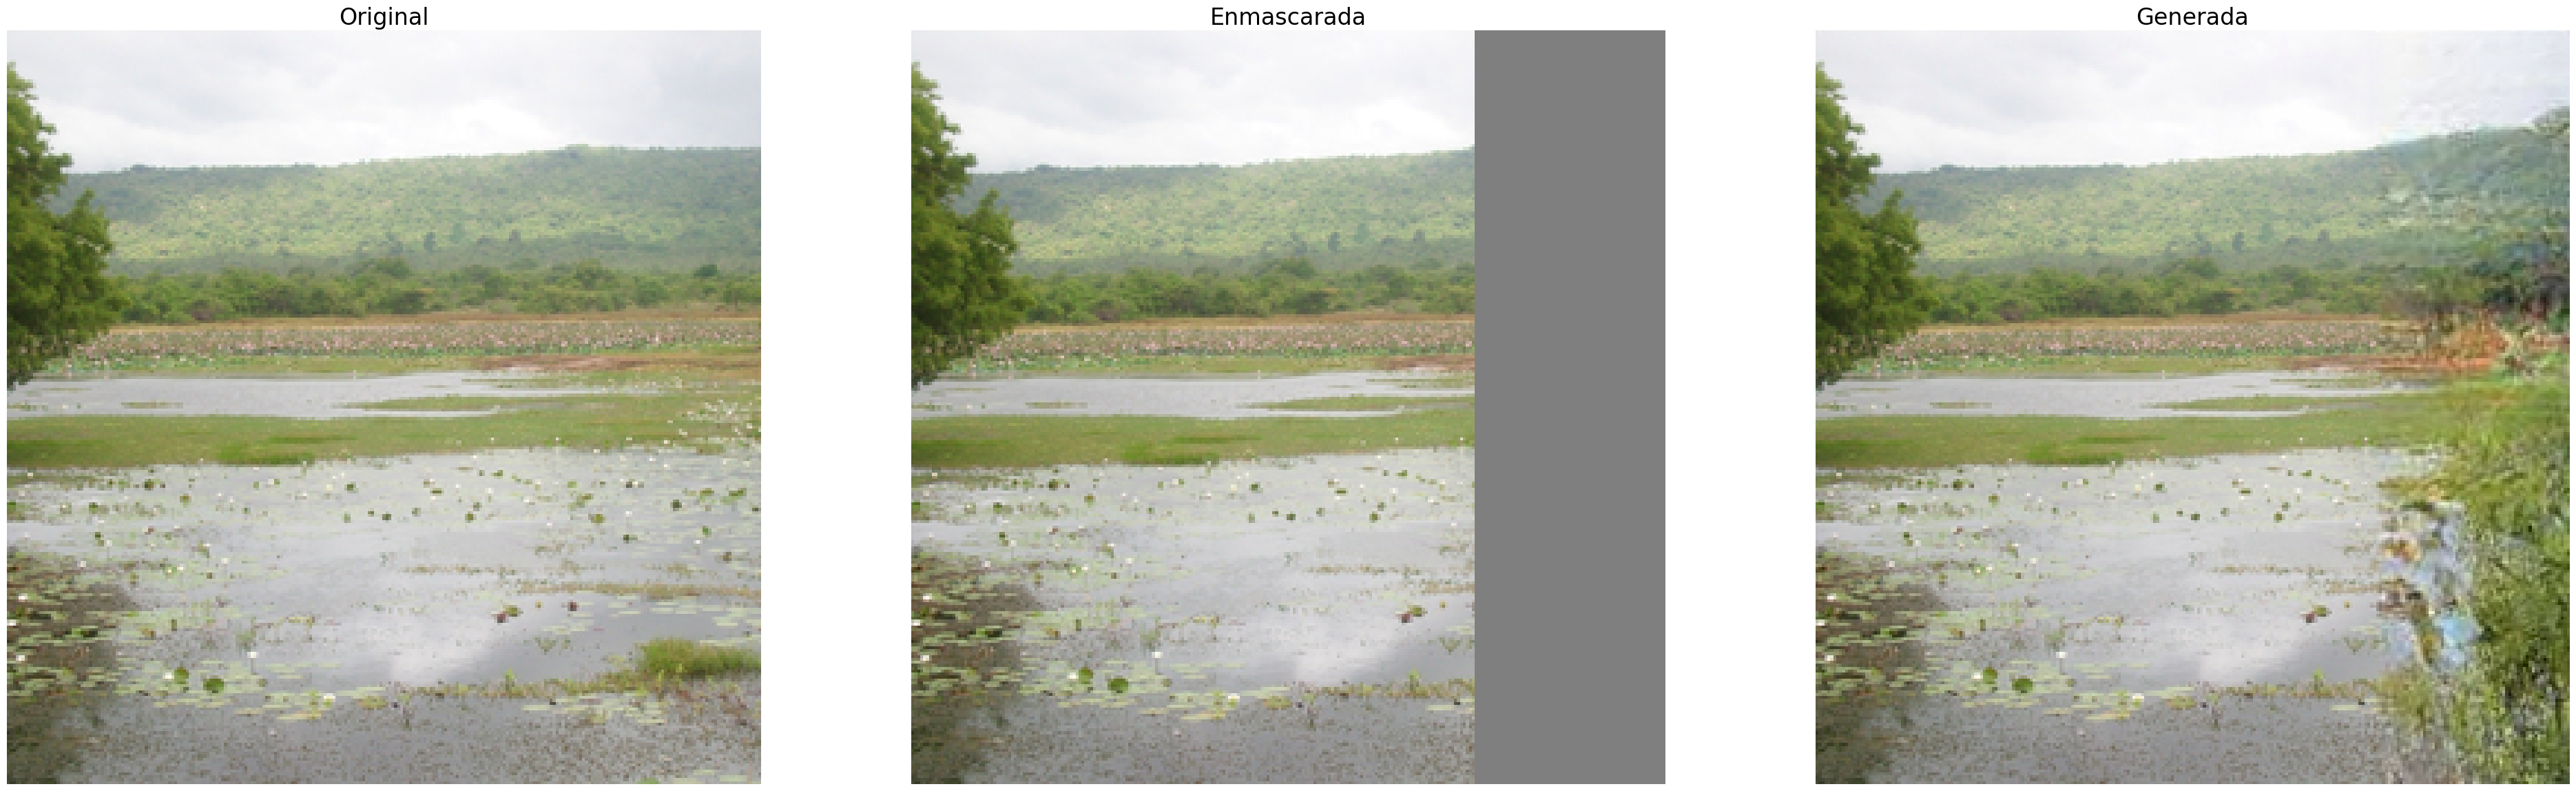

In [33]:
resultado = mdl.signatures['default'](tf.constant(imagen))
imagen_generada =  resultado['default']
imagen_enmascarada = resultado['masked_image']

mostrar_comparacion(imagen, imagen_enmascarada, imagen_generada)

Realiza pruebas con las distintas imágenes y los distintos modelos. ¿Qué obtienes como conclusión?